In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, CategoricalNB
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.decomposition import PCA

In [ ]:
# encoded data
df = pd.read_csv("Fully_Encoded.csv", header=0)
df.head(10)

In [11]:
# split into feature columns and sales columns (y vars.)
sales = [name for name in list(df.columns) if 'Sales' in name]
feats = [name for name in list(df.columns) if name not in sales]

y_cols = df[sales]
x_cols = df[feats]

x_cols


,Name,Platform,Year_of_Release,Genre,Publisher,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,10919.0,26.0,2006.0,10.0,361.0,76.000000,51.000000,77.000000,322.000000,1008.000000,1.000000
1,9265.0,11.0,1985.0,4.0,361.0,68.997119,26.440992,74.727254,163.008846,835.050081,3.558616
2,5534.0,26.0,2008.0,6.0,361.0,82.000000,73.000000,80.000000,709.000000,1008.000000,1.000000
3,10921.0,26.0,2009.0,10.0,361.0,80.000000,73.000000,77.000000,192.000000,1008.000000,1.000000
4,7294.0,5.0,1996.0,7.0,361.0,68.997119,26.440992,74.727254,163.008846,835.050081,3.558616
...,...,...,...,...,...,...,...,...,...,...,...
16411,8236.0,17.0,2016.0,0.0,502.0,68.997119,26.440992,74.727254,163.008846,835.050081,3.558616
16412,5084.0,28.0,2006.0,10.0,91.0,68.997119,26.440992,74.727254,163.008846,835.050081,3.558616
16413,3828.0,20.0,2016.0,1.0,233.0,68.997119,26.440992,74.727254,163.008846,835.050081,3.558616
16414,8913.0,6.0,2003.0,4.0,547.0,68.997119,26.440992,74.727254,163.008846,835.050081,3.558616


# Naive Bayes Classifier

In [ ]:
for region in y_cols:
    no_sales = len(df[df[region]==0])
    print(f'{region[:2]} data is {no_sales/len(df):.2%} items with no recorded sales.\n')

NA data is 27.08% items with no recorded sales.

EU data is 35.13% items with no recorded sales.

JP data is 62.57% items with no recorded sales.

Ot data is 39.42% items with no recorded sales.

Gl data is 0.00% items with no recorded sales.



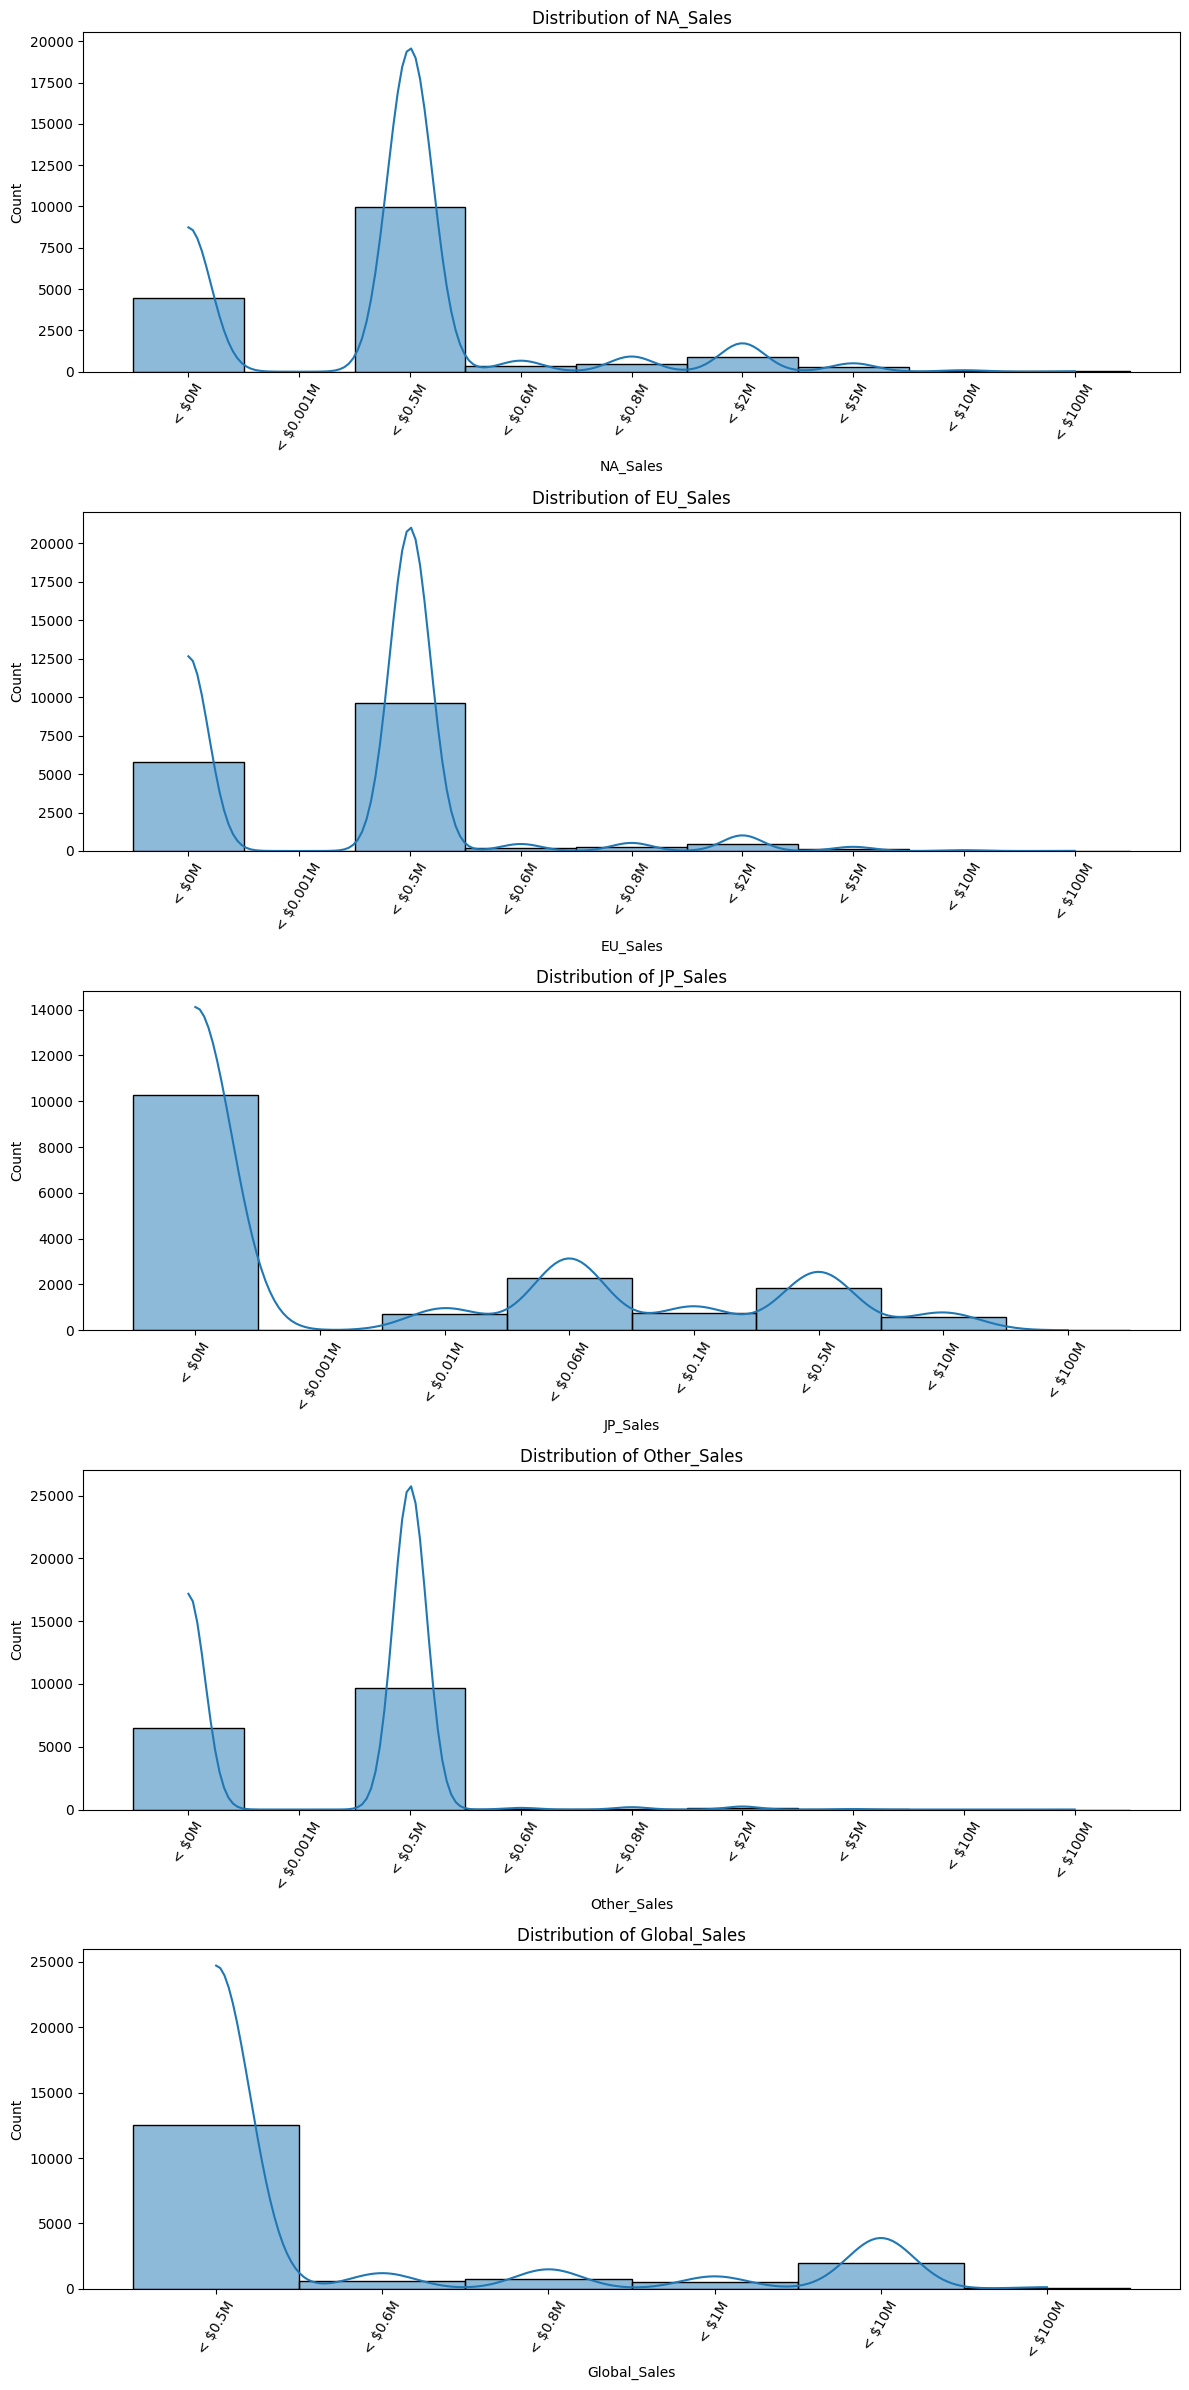

In [12]:
# split into bins
cuts = {
    'NA_Sales':     [float('-inf'), 0, 0.001, 0.5, 0.6, 0.8, 2, 5, 10, 100],
    'EU_Sales':     [float('-inf'), 0, 0.001, 0.5, 0.6, 0.8, 2, 5, 10, 100],
    'JP_Sales':     [float('-inf'), 0, 0.001, 0.01, 0.06, 0.1, 0.5, 10, 100],
    'Other_Sales':  [float('-inf'), 0, 0.001, 0.5, 0.6, 0.8, 2, 5, 10, 100],
    'Global_Sales': [float('-inf'), 0, 0.001, 0.5, 0.6, 0.8, 1, 10, 100]
}

y_bins = {}

# Plot the top 3 principal components with their corresponding feature names
fig, axs = plt.subplots(5, 1, figsize=(12,24))
for i in range(5):
    y = y_cols.columns[i]
    bin_labels = [f"< ${c}M" for c in cuts[y]][1:]
    y_var = pd.Series(pd.cut(y_cols[y], bins = cuts[y], labels = bin_labels))
    y_bins[y] = y_var
    
    sns.histplot(data = y_var, kde = True, ax = axs[i])
    axs[i].set_title(f'Distribution of {y}')
    plt.setp(axs[i].get_xticklabels(), rotation=60)
    plt.tight_layout()

y_col_bins = pd.DataFrame(y_bins) 


In [ ]:

def nb_modeling(x_cols, y_col_bins):
    # separate into test and train data
    x_train, x_test, y_train, y_test = train_test_split(x_cols, y_col_bins, test_size=0.2, random_state=0)
    # store model scores for comparison
    scores = {y:{'Categorical':float, 'Gaussian':float} for y in y_cols}

    # predict bins with Categorical Naive Bayes
    print('Categorical Naive Bayes')
    clf = CategoricalNB()
    for y in y_cols: 
        clf.fit(x_train, y_train[y])
        clf.predict(x_test)
        
        score = clf.score(x_test,y_test[y])
        scores[y]['Categorical'] = score
        
        print(f"{y} Score: {score}")  

    print('\n')
    # predict bins with Gaussian Naive Bayes
    print('Gaussian Naive Bayes')
    clf = GaussianNB()
    for y in y_cols: 
        clf.fit(x_train, y_train[y])
        clf.predict(x_test)
        
        score = clf.score(x_test,y_test[y])
        scores[y]['Gaussian'] = score
        
        print(f"{y} Score: {score}")  

    print('\n')
    for cat in scores:
        gauss = scores[cat]['Gaussian']
        cate = scores[cat]['Categorical']
        diff = gauss - cate

        if diff > 0:
            print(f'{cat} scored {diff:.2%} higher with Gaussian NB.')

        else:
            print(f'{cat} scored {-diff:.2%} higher with Categorical NB.')
        
nb_modeling(x_cols, y_col_bins)        

Categorical Naive Bayes
NA_Sales Score: 0.7302070645554202
EU_Sales Score: 0.7110231425091352
JP_Sales Score: 0.7149817295980512
Other_Sales Score: 0.7186358099878197
Global_Sales Score: 0.7904993909866017


Gaussian Naive Bayes
NA_Sales Score: 0.6735688185140073
EU_Sales Score: 0.587088915956151
JP_Sales Score: 0.5925700365408039
Other_Sales Score: 0.6154080389768575
Global_Sales Score: 0.785931790499391


NA_Sales scored 5.66% higher with Categorical NB.
EU_Sales scored 12.39% higher with Categorical NB.
JP_Sales scored 12.24% higher with Categorical NB.
Other_Sales scored 10.32% higher with Categorical NB.
Global_Sales scored 0.46% higher with Categorical NB.


# PCA to try and improve performance

In [ ]:

# Fit PCA model with x features
pca = PCA(n_components=11)
pca.fit(x_cols)
# get principal components
X_pca = pca.transform(x_cols)

# Get the explained variance of PC and sort by weight
explained_var = pca.explained_variance_ratio_
importance = list(zip(x_cols.columns, explained_var))
importance.sort(key=lambda x: x[1], reverse=True)
print('Feature importance by explained variance:\n')
for i, (feat, var) in enumerate(importance):
    print(f'{i+1}. {feat}: {var:.4f}')



Feature importance by explained variance:

1. Name: 0.9711
2. Platform: 0.0134
3. Year_of_Release: 0.0129
4. Genre: 0.0026
5. Publisher: 0.0000
6. Critic_Score: 0.0000
7. Critic_Count: 0.0000
8. User_Score: 0.0000
9. User_Count: 0.0000
10. Developer: 0.0000
11. Rating: 0.0000


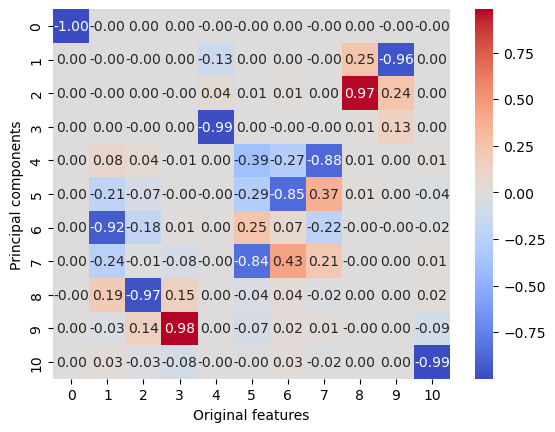

In [ ]:
import seaborn as sns

# Plot a heatmap of the component weights
sns.heatmap(pca.components_, cmap='coolwarm', annot=True, fmt='.2f')
plt.xlabel('Original features')
plt.ylabel('Principal components')

plt.show()


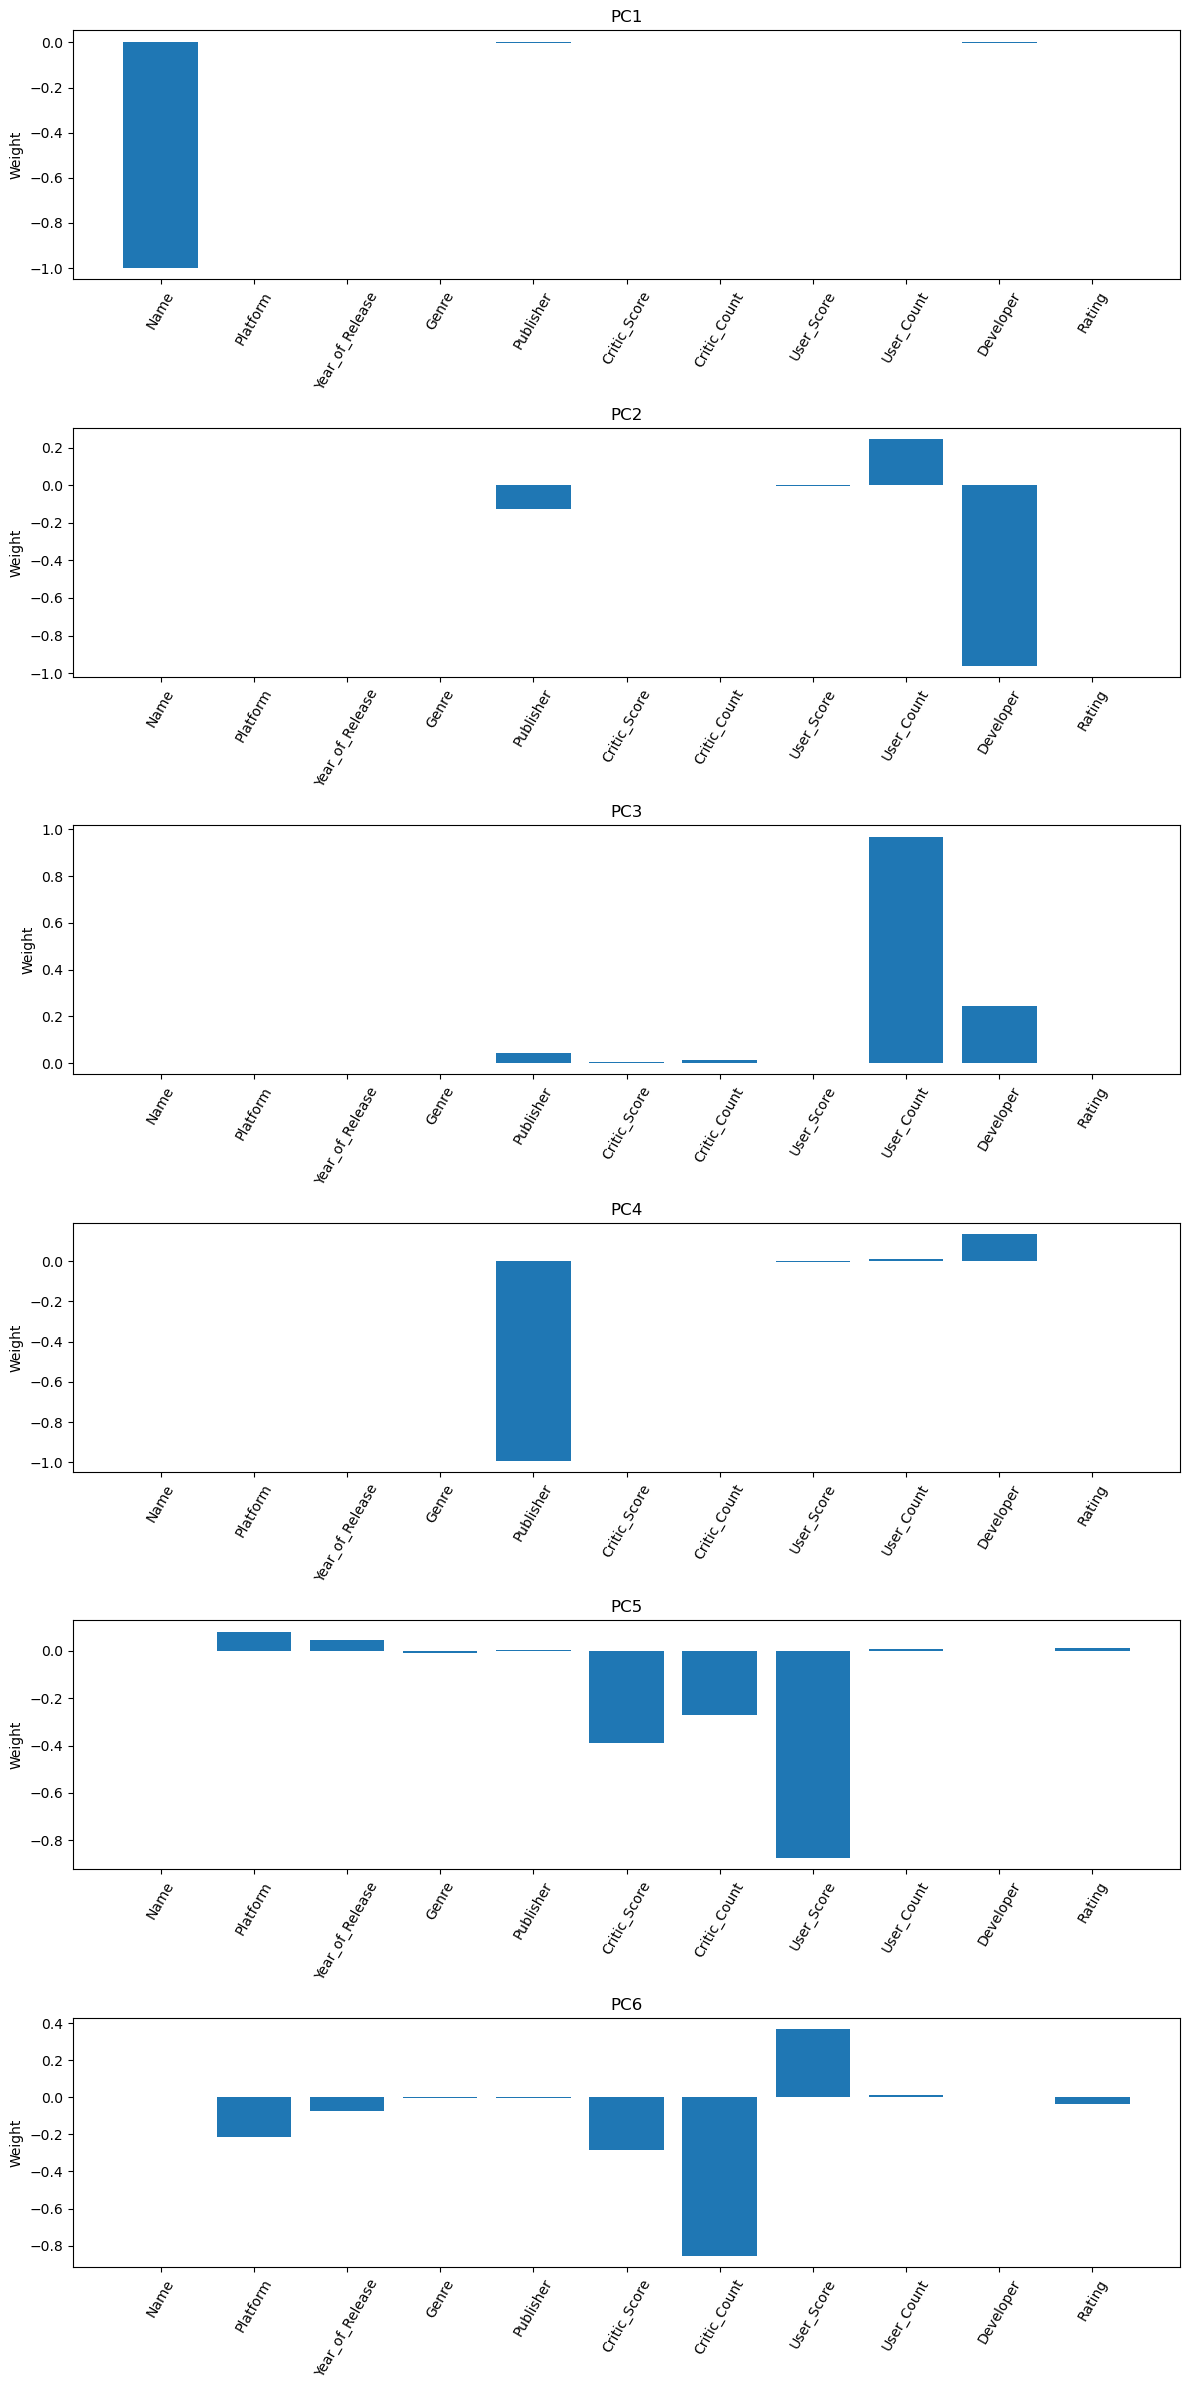

In [ ]:
# Get the names of the input features
feature_names = list(x_cols.columns)
n_plots = 6

# Show size of each PC vector's eigenvalues/weights
fig, axs = plt.subplots(n_plots, 1, figsize=(12, 24))
for i in range(n_plots):
    axs[i].bar(feature_names, pca.components_[i])
    axs[i].set_title(f'PC{i+1}')
    axs[i].set_ylabel('Weight')
    plt.setp(axs[i].get_xticklabels(), rotation=60)
    
plt.tight_layout()
plt.show()


In [19]:
# Drop the name tag and least important features and use the remaining classification
drop_cols = ['Name','Critic_Score','User_Count','Rating','Developer']

x_cols_reduced = x_cols.drop(drop_cols,axis=1)

nb_modeling(x_cols_reduced, y_col_bins)


Categorical Naive Bayes
NA_Sales Score: 0.7749695493300852
EU_Sales Score: 0.7621802679658952
JP_Sales Score: 0.7122411693057247
Other_Sales Score: 0.7655298416565165
Global_Sales Score: 0.7953714981729598


Gaussian Naive Bayes
NA_Sales Score: 0.6470767356881851
EU_Sales Score: 0.5828258221680876
JP_Sales Score: 0.619062119366626
Other_Sales Score: 0.618148599269184
Global_Sales Score: 0.7865408038976858


NA_Sales scored 12.79% higher with Categorical NB.
EU_Sales scored 17.94% higher with Categorical NB.
JP_Sales scored 9.32% higher with Categorical NB.
Other_Sales scored 14.74% higher with Categorical NB.
Global_Sales scored 0.88% higher with Categorical NB.


In [16]:
# Fit PCA model with x features
pca = PCA(n_components=6)
pca.fit(x_cols_reduced)
# get principal components
X_pca = pca.transform(x_cols_reduced)

# Get the explained variance of PC and sort by weight
explained_var = pca.explained_variance_ratio_
importance = list(zip(x_cols_reduced.columns, explained_var))
importance.sort(key=lambda x: x[1], reverse=True)
print('Feature importance by explained variance:\n')
for i, (feat, var) in enumerate(importance):
    print(f'{i+1}. {feat}: {var:.4f}')

Feature importance by explained variance:

1. Platform: 0.9852
2. Year_of_Release: 0.0059
3. Genre: 0.0054
4. Publisher: 0.0021
5. Critic_Count: 0.0010
6. User_Score: 0.0004


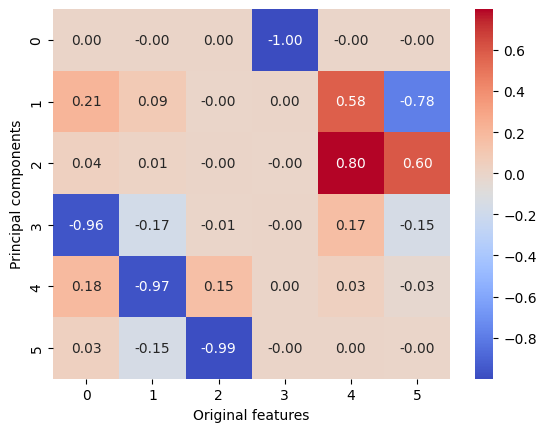

In [17]:
# Plot a heatmap of the component weights
sns.heatmap(pca.components_, cmap='coolwarm', annot=True, fmt='.2f')
plt.xlabel('Original features')
plt.ylabel('Principal components')

plt.show()